In [1]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

1. What is the distribution of age among heart failure patients in the dataset?

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
# no null values to be handle

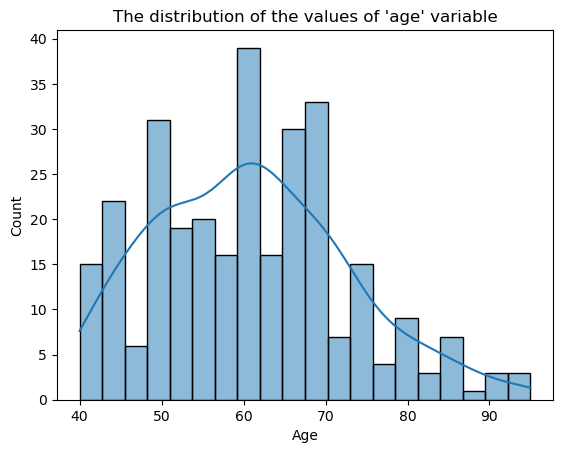

In [7]:
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title("The distribution of the values of 'age' variable")
plt.xlabel("Age")
# plt.ylabel("Frequency")
# plt.grid(True)
plt.show()

2. How does the death rate vary with age?

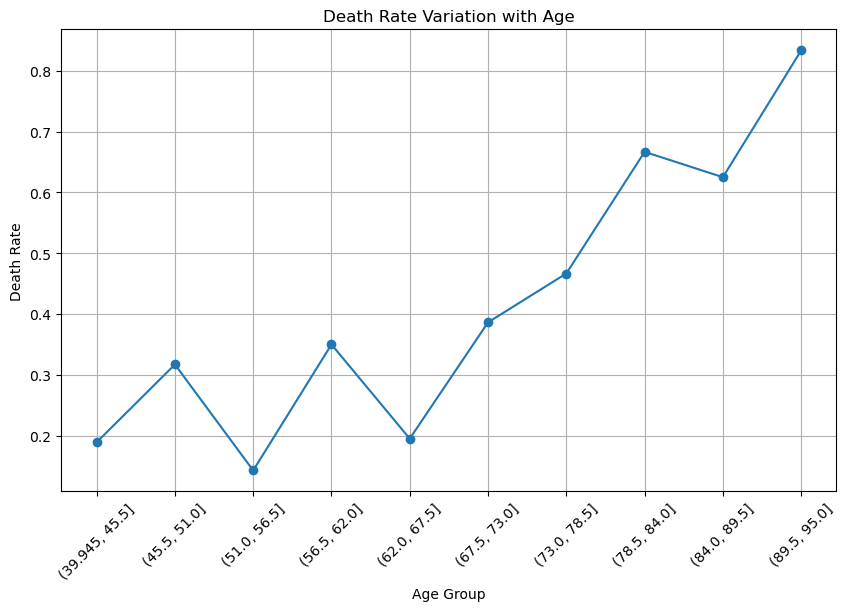

In [8]:
death_rate_by_age = df.groupby(pd.cut(df['age'], bins=10))['DEATH_EVENT'].mean()

# Plotting the relationship between age and death rate
plt.figure(figsize=(10, 6))
plt.plot(death_rate_by_age.index.astype(str), death_rate_by_age.values, marker='o', linestyle='-')
plt.title('Death Rate Variation with Age')
plt.xlabel('Age Group')
plt.ylabel('Death Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

3. What is the percentage of male and female patients in the dataset?

In [9]:
gender_counts = df['sex'].value_counts()

# Calculating the percentage of male and female patients
total_patients = df.shape[0]
male_percentage = (gender_counts[1] / total_patients) * 100
female_percentage = (gender_counts[0] / total_patients) * 100

# Displaying the results
print("Percentage of male patients: {:.2f}%".format(male_percentage))
print("Percentage of female patients: {:.2f}%".format(female_percentage))


Percentage of male patients: 64.88%
Percentage of female patients: 35.12%


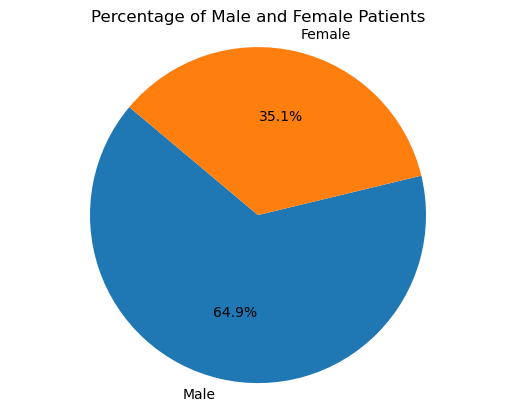

In [10]:
labels = ['Male', 'Female']
sizes = [male_percentage, female_percentage]
# gender_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Male and Female Patients')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

5. Is there a correlation between creatinine and sodium level n the blood ?

In [11]:
cor_column = ['creatinine_phosphokinase','serum_creatinine' ,'serum_sodium']

In [12]:
df[cor_column].corr()

,creatinine_phosphokinase,serum_creatinine,serum_sodium
creatinine_phosphokinase,1.000000,-0.016408,0.059550
serum_creatinine,-0.016408,1.000000,-0.189095
serum_sodium,0.059550,-0.189095,1.000000


In [13]:
# creatinine_phosphokinase and serum_sodium have very minimal positive correlation
# serum_creatinine and serum_sodium have negative correlation

6. How does the prevalence of high blood pressure differ between male and female patients?

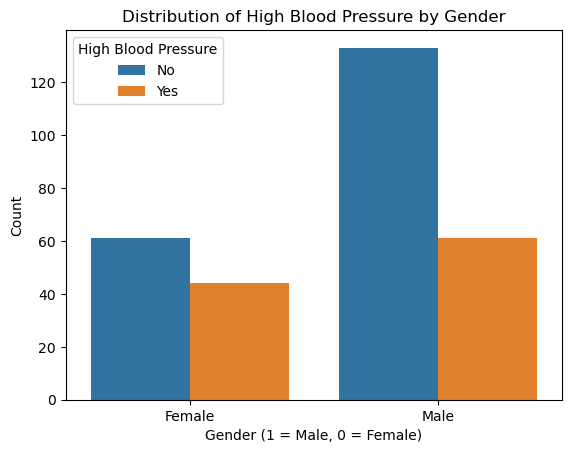

In [14]:
sns.countplot(x='sex', hue='high_blood_pressure', data=df)
plt.title('Distribution of High Blood Pressure by Gender')
plt.xlabel('Gender (1 = Male, 0 = Female)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.legend(title='High Blood Pressure', labels=['No', 'Yes'])

7. What is the relationship between smoking habits and the occurrence of heart failure?

<function matplotlib.pyplot.show(close=None, block=None)>

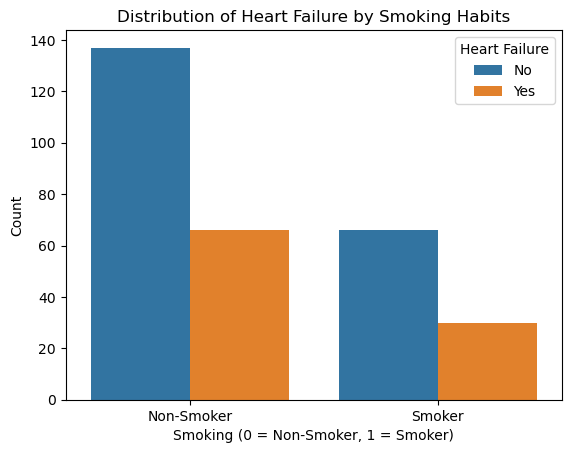

In [15]:
sns.countplot(x='smoking', hue='DEATH_EVENT', data=df)
plt.title('Distribution of Heart Failure by Smoking Habits')
plt.xlabel('Smoking (0 = Non-Smoker, 1 = Smoker)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'])
plt.legend(title='Heart Failure', labels=['No', 'Yes'])
plt.show

8. Are there any notable patterns in the distribution of death events across different age groups?

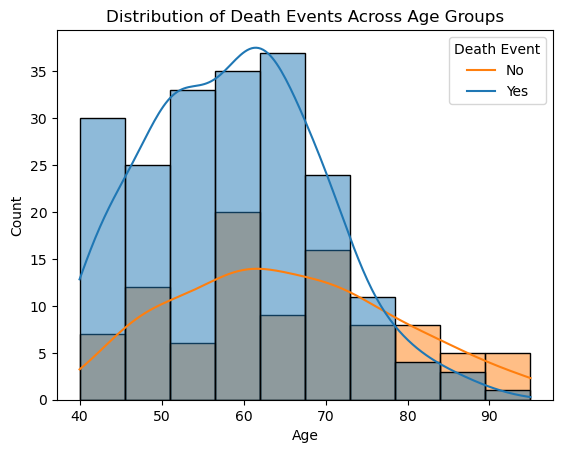

In [16]:
sns.histplot(x='age', hue='DEATH_EVENT', data=df, bins=10, kde=True)
plt.title('Distribution of Death Events Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Death Event', labels=['No', 'Yes'])
plt.show()

9. Is there any significant difference in interaction or reaction between patients with and without diabetes?

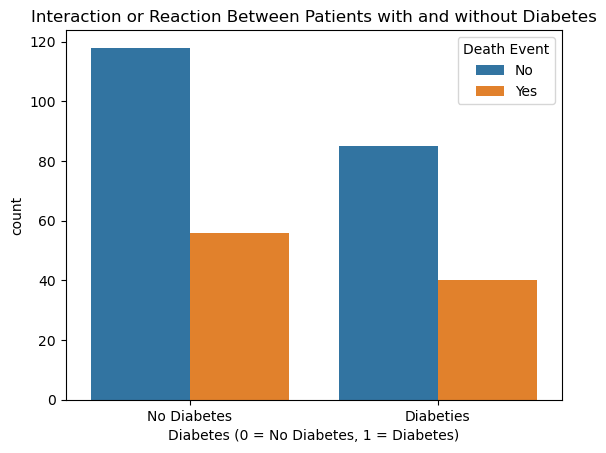

In [17]:
sns.countplot(x='diabetes', hue='DEATH_EVENT', data=df)
plt.title('Interaction or Reaction Between Patients with and without Diabetes')
plt.xlabel('Diabetes (0 = No Diabetes, 1 = Diabetes)')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabeties'])
plt.legend(title='Death Event', labels=['No', 'Yes'])

10. How does the serum creatinine level vary between patients who survived and those who did not?

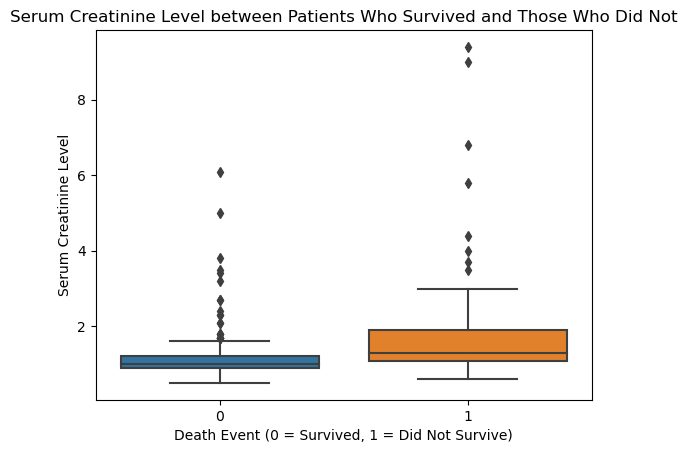

In [22]:
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Serum Creatinine Level between Patients Who Survived and Those Who Did Not')
plt.xlabel('Death Event (0 = Survived, 1 = Did Not Survive)')
plt.ylabel('Serum Creatinine Level')
plt.show()